# Linear Regression Assignment for Car Pricing in US based on existing data set


In [163]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

In [107]:
# Read input file
carpricing = pd.read_csv('CarPrice_Assignment.csv')
carpricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [108]:
# Undertsand the data
carpricing.info()
carpricing.shape
carpricing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# All variables have data for all the rows, (i.e no Missing values)

In [109]:
# All variables have data for all the rows, (i.e no Missing values)

# take a backup of carpricing
carpricing_Org = carpricing


# Data Visualisation


In [110]:
# Check the columns
carpricing.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<Figure size 1440x1008 with 0 Axes>

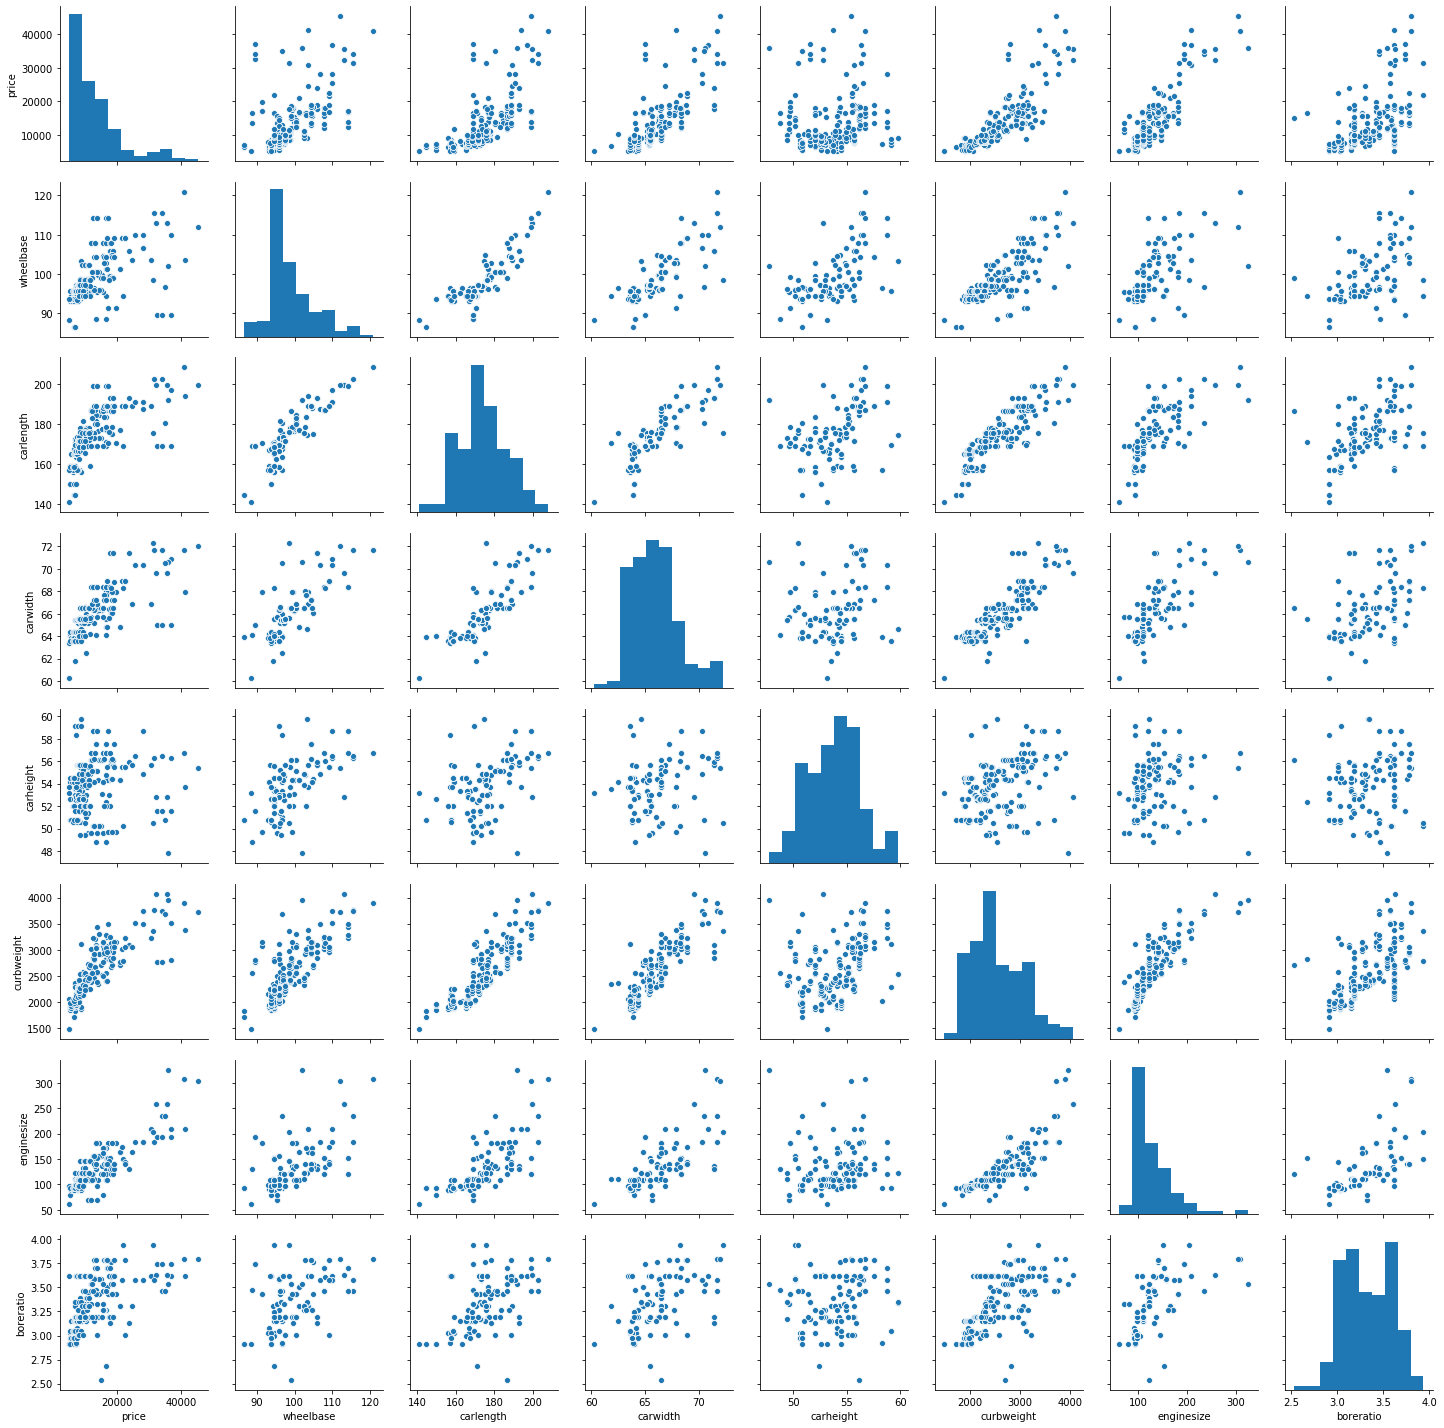

In [111]:
# Visualise all numeric variables using scatter plots to find relationship with price for all numeric input variables

num_vars1 =  ['price','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio' ]

num_vars2 = ['price', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
plt.figure(figsize = [20,14])
sns.pairplot(carpricing[num_vars1])
plt.show()

We see that few independent variables have positive correlation and few have mixed (or no) correlation with pricing from the scatter plots.


<Figure size 1440x1008 with 0 Axes>

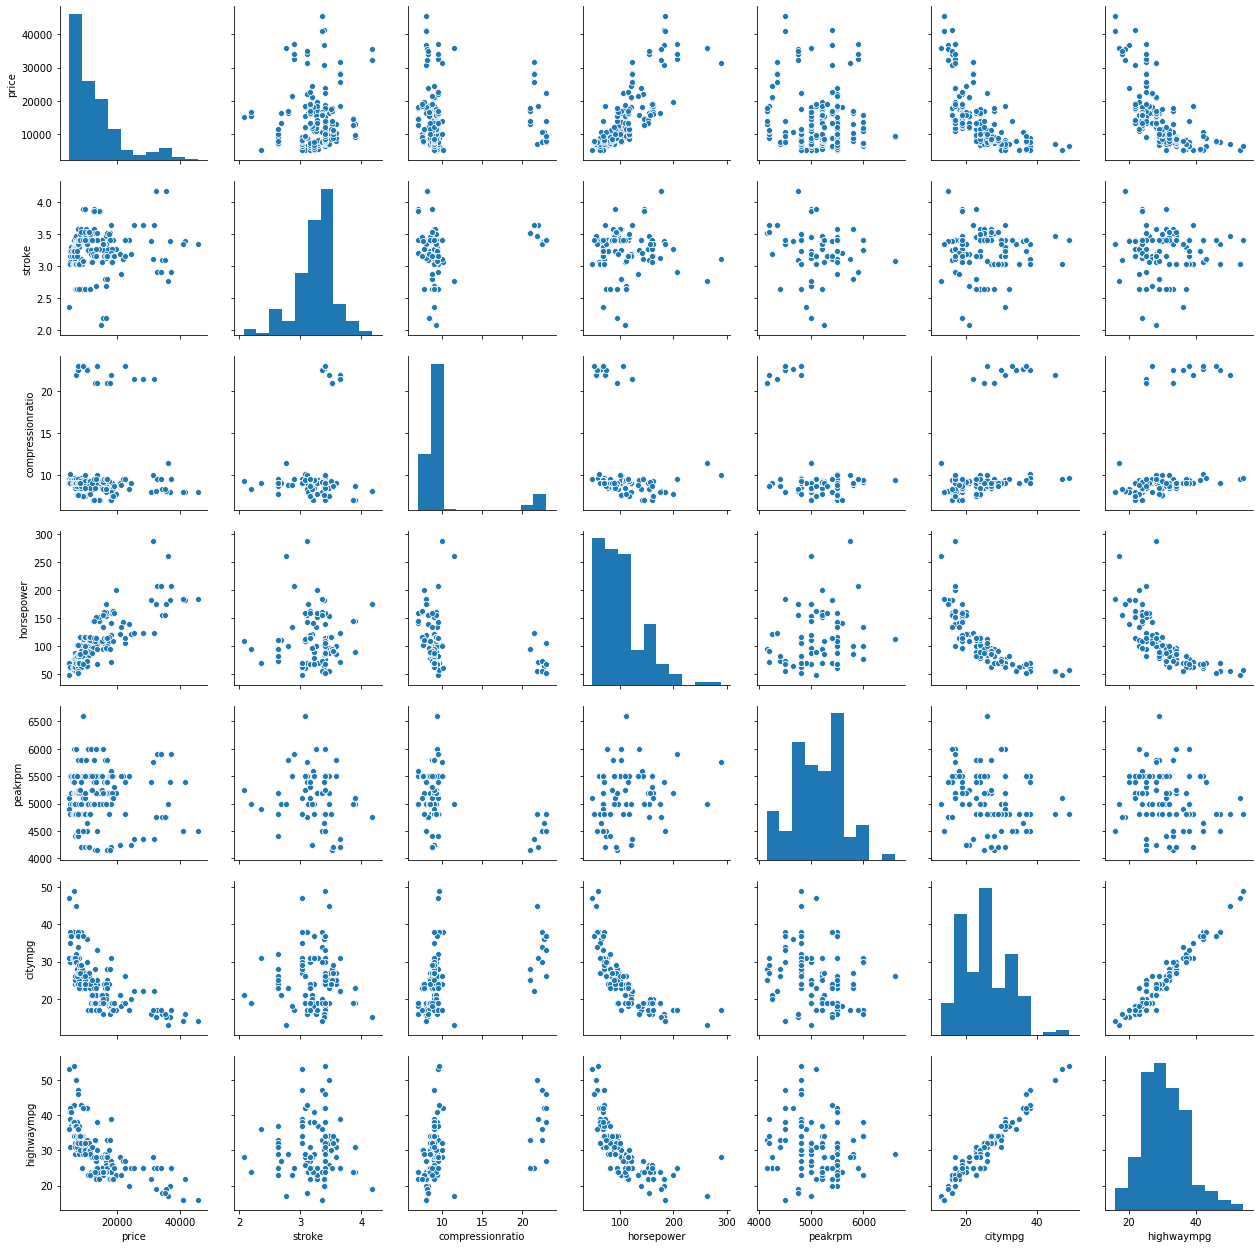

In [113]:
plt.figure(figsize = [20,14])
sns.pairplot(carpricing[num_vars2])
plt.show()

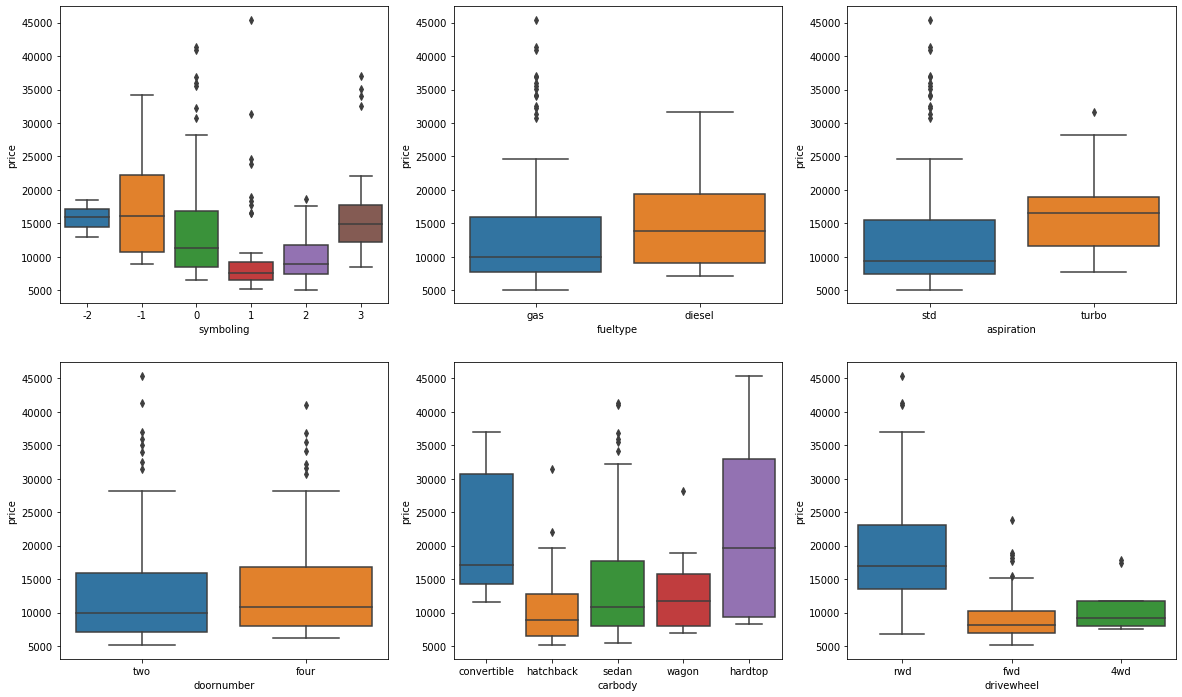

In [114]:
# Visualising few categorical variables with Price using BoxPlots

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carpricing)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carpricing)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carpricing)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carpricing)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carpricing)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carpricing)
plt.show() 

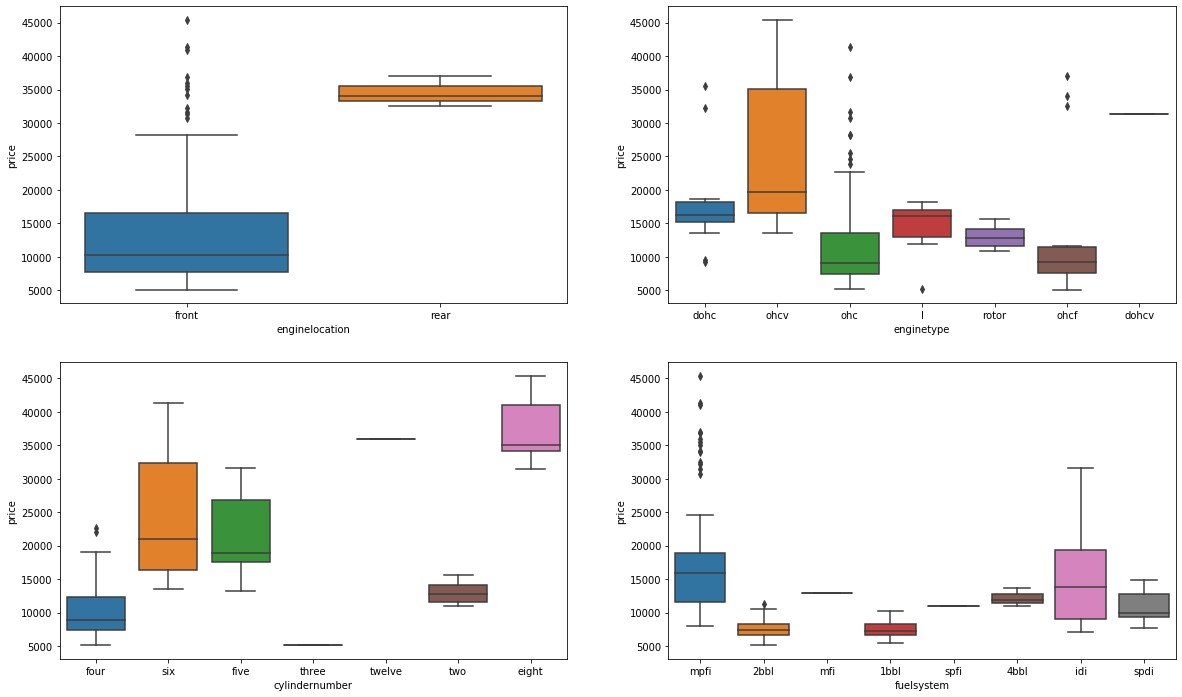

In [115]:
# Box plots for other catergorical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = carpricing)
plt.subplot(2,2,2)
sns.boxplot(x = 'enginetype', y = 'price', data = carpricing)
plt.subplot(2,2,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carpricing)
plt.subplot(2,2,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carpricing)

plt.show()

# Data Preparation


It is mentioned in the problem statement that CarName variable is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. We need to consider only company name as the independent variable for model building. 
Let us create new variable with only Company Name

In [116]:
carpricing['CarName'] = carpricing['CarName'].apply(lambda x : x.split(' ')[0])

carpricing['CarName'] 

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

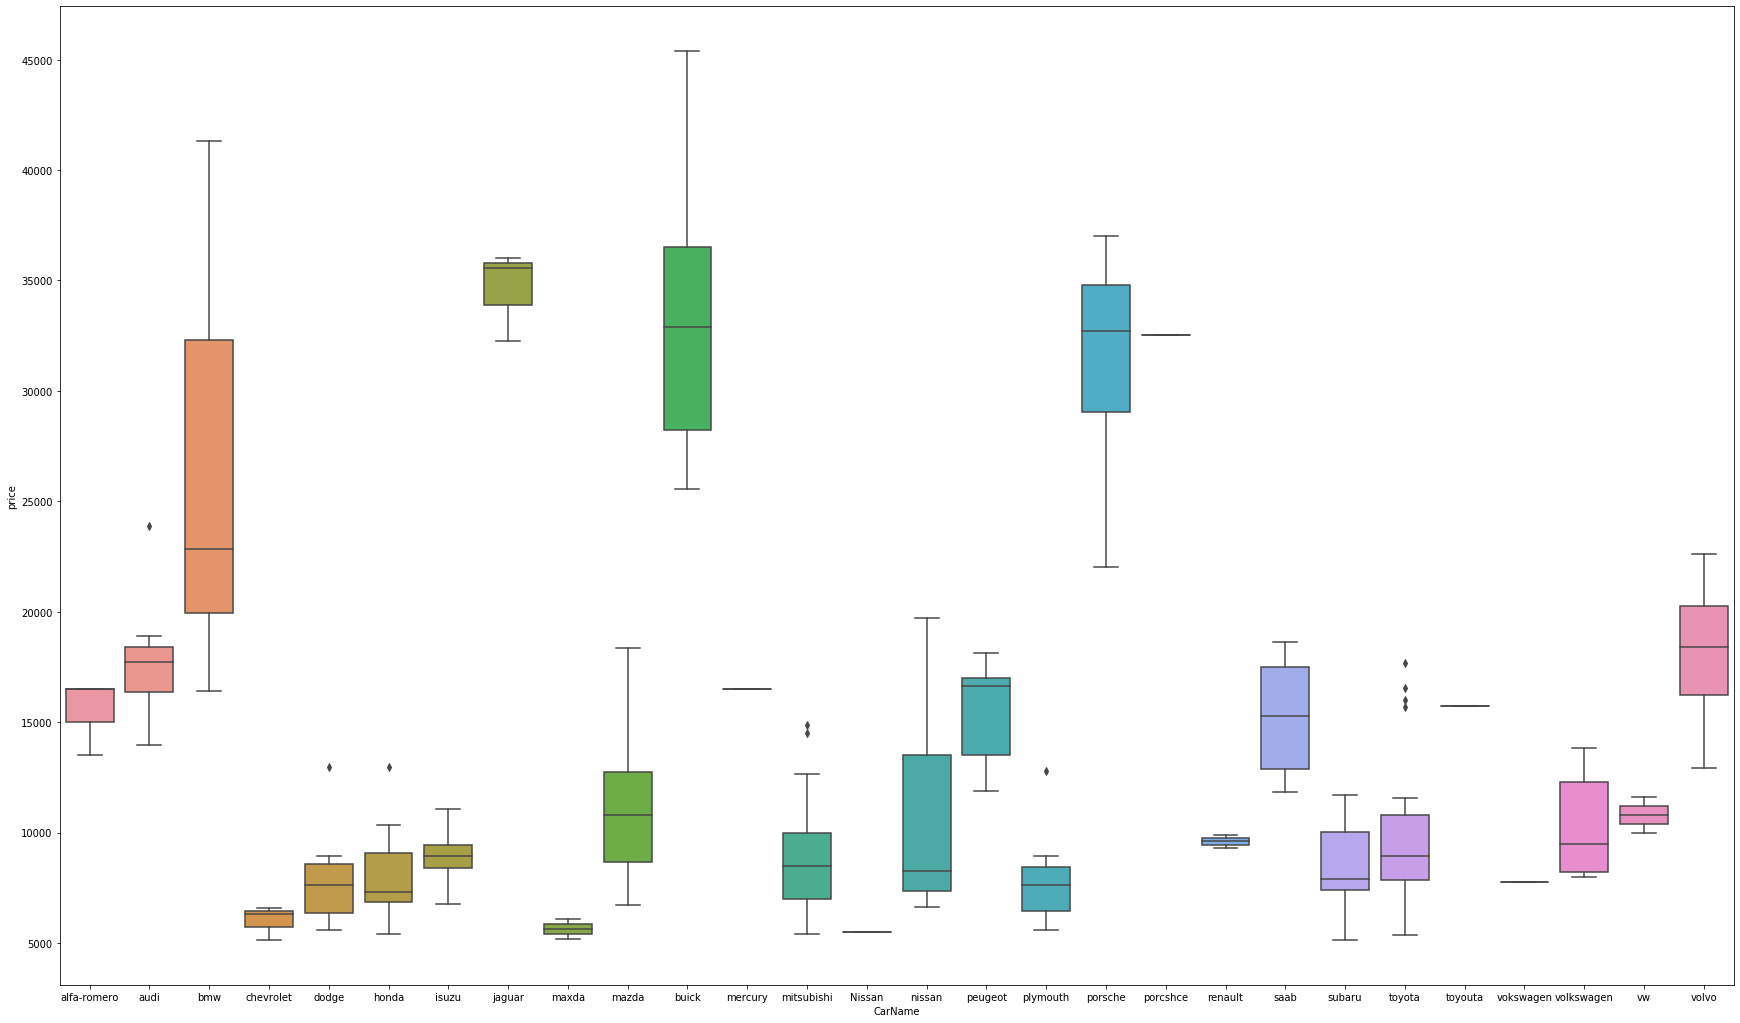

In [117]:
# Let us see the boxplot between Carname and Price
plt.figure(figsize = (30,18))
sns.boxplot(x = 'CarName', y = 'price', data = carpricing)
plt.show()


Remove Car_Id from carpricing as it is just an id and not a independent variable

In [118]:
carpricing = carpricing.drop('car_ID', axis = 1)

In [119]:
carpricing.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Categorical  variables Interpretation. 
We need to convert category variables from text to numeric values in Linear Regression.

Below are the text format Binary variables


In [120]:
binary_vars = ['enginelocation','fueltype','aspiration','doornumber']

In [121]:
# From the boxplot, we can see that enginelocation is a binary variable with values front and rear.
# We will mark front as 1 and rear as 0

carpricing['enginelocation'] = carpricing['enginelocation'].apply(lambda x : 1 if x == 'front' else 0 )

In [122]:
# From the boxplot, we can see that fueltype is a binary variable with values gas and deisel.
# We will mark gas as 1 and deisel as 0

carpricing['fueltype'] = carpricing['fueltype'].apply(lambda x : 1 if x == 'gas' else 0 )

In [169]:
# From the boxplot, we can see that aspiration is a binary variable with values std and turbo.
# We will mark std as 1 and turbo as 0
carpricing['aspiration'] = carpricing['aspiration'].apply(lambda x : 1 if x == 'std' else 0 )


In [125]:
# From the boxplot, we can see that doornumber is a binary variable with values two and four.
# We will mark two as 2 and four as 4

carpricing['doornumber'] = carpricing['doornumber'].apply(lambda x : 2 if x == 'two' else 4 )

In [171]:
carpricing.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
0,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


We can see that all four binary variables are changed with 1 and 0 as expected
Door number changed to 2 and 4 as per its text value.


# Handling Categorical Variables
We can use Find and Replace method to replace easily interpreted text values to numbers
Below are multi categorical variables. We need to create new columns for them using dummies

In [127]:
#carpricing['cylindernumber'].value_counts()
carpricing.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,1,0,2,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,1,0,2,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,1,0,2,hatchback,rwd,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,0,4,sedan,fwd,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,0,4,sedan,4wd,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [129]:
# cylindernumber is a categorical variable, where the values are text form of numbers. 
carpricing['cylindernumber'].value_counts()


four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [130]:
#Let us replace text value to its corresponding number

cleanup_nums = {'cylindernumber': {'four': 4, 'six': 6, 'five': 5, 'eight': 8,
                                  'two': 2, 'twelve': 12, 'three':3 }}

In [131]:
carpricing.replace(cleanup_nums, inplace=True)
carpricing.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,1,0,2,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,1,0,2,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,1,0,2,hatchback,rwd,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,0,4,sedan,fwd,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,0,4,sedan,4wd,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [132]:
carpricing['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [68]:
# List of categorical variables which are not binary
cat_vars = ['symboling','carbody','drivewheel','enginetype','fuelsystem','CarName'] 

In [133]:
# Let us treat symboling variable first
carpricing['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

symboling is a catergorical variable. As its values are numerical, we are not encoding it.

In [69]:
# Create Dummy variables for catergoroical variable carbody
carpricing['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [136]:
status = pd.get_dummies(carpricing['carbody'])
# Check what the dataset 'status' looks like
status.head()


,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0



Now, you don't need five columns. You can drop the convertible column, as the type of Symboling can be identified with just the last four columns where — 

0000 will correspond to convertible

1000 will correspond to hardtop

0100 will correspond to hatchback

0010 will correspond to sedan

0001 will correspond to wagon

In [137]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(carpricing['carbody'], drop_first = True)
status.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [138]:
carpricing = pd.concat([carpricing, status], axis = 1)
# Drop 'carbody' as we have created the dummies for it

carpricing.drop(['carbody'], axis = 1, inplace = True)

carpricing.head()

,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon
0,3,alfa-romero,1,0,2,rwd,1,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,0,0,0,0
1,3,alfa-romero,1,0,2,rwd,1,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,0,0,0,0
2,1,alfa-romero,1,0,2,rwd,1,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,0,1,0,0
3,2,audi,1,0,4,fwd,1,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,0,0,1,0
4,2,audi,1,0,4,4wd,1,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,0,0,1,0


In [73]:
# Create Dummy variables for catergoroical variable drivewheel
carpricing['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [141]:
status = pd.get_dummies(carpricing['drivewheel'], prefix = 'drive_', drop_first = True)
# Check what the dataset 'status' looks like
status.head()

,drive__fwd,drive__rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


Now, you don't need three columns. You can drop the 4wd column, as the type of Symboling can be identified with just the last two columns where — 

00 will correspond to 4wd

10 will correspond to fwd

01 will correspond to rwd

In [142]:
carpricing = pd.concat([carpricing, status], axis = 1)
# Drop 'drivewheel' as we have created the dummies for it

carpricing.drop(['drivewheel'], axis = 1, inplace = True)

carpricing.head()

,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,drive__fwd,drive__rwd
0,3,alfa-romero,1,0,2,1,88.6,168.8,64.1,48.8,...,5000,21,27,13495.0,0,0,0,0,0,1
1,3,alfa-romero,1,0,2,1,88.6,168.8,64.1,48.8,...,5000,21,27,16500.0,0,0,0,0,0,1
2,1,alfa-romero,1,0,2,1,94.5,171.2,65.5,52.4,...,5000,19,26,16500.0,0,1,0,0,0,1
3,2,audi,1,0,4,1,99.8,176.6,66.2,54.3,...,5500,24,30,13950.0,0,0,1,0,1,0
4,2,audi,1,0,4,1,99.4,176.6,66.4,54.3,...,5500,18,22,17450.0,0,0,1,0,0,0


In [79]:
# Create Dummy variables for catergoroical variable enginetype
carpricing['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [146]:
status = pd.get_dummies(carpricing['enginetype'], prefix = 'engine_', drop_first = True)
# Check what the dataset 'status' looks like
status.head()

,engine__dohcv,engine__l,engine__ohc,engine__ohcf,engine__ohcv,engine__rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [147]:
carpricing = pd.concat([carpricing, status], axis = 1)
# Drop 'enginetype' as we have created the dummies for it

carpricing.drop(['enginetype'], axis = 1, inplace = True)

carpricing.head()

,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,sedan,wagon,drive__fwd,drive__rwd,engine__dohcv,engine__l,engine__ohc,engine__ohcf,engine__ohcv,engine__rotor
0,3,alfa-romero,1,0,2,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,0
1,3,alfa-romero,1,0,2,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,0
2,1,alfa-romero,1,0,2,1,94.5,171.2,65.5,52.4,...,0,0,0,1,0,0,0,0,1,0
3,2,audi,1,0,4,1,99.8,176.6,66.2,54.3,...,1,0,1,0,0,0,1,0,0,0
4,2,audi,1,0,4,1,99.4,176.6,66.4,54.3,...,1,0,0,0,0,0,1,0,0,0


In [148]:
# Create Dummy variables for catergoroical variable fuelsystem
carpricing['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [149]:
# CreateDummy varuiables for fuelsystem

status = pd.get_dummies(carpricing['fuelsystem'], prefix = 'fuelsystem_', drop_first = True)
# Check what the dataset 'status' looks like
status.head()

,fuelsystem__2bbl,fuelsystem__4bbl,fuelsystem__idi,fuelsystem__mfi,fuelsystem__mpfi,fuelsystem__spdi,fuelsystem__spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [150]:
carpricing = pd.concat([carpricing, status], axis = 1)
# Drop 'fuelsystem' as we have created the dummies for it

carpricing.drop(['fuelsystem'], axis = 1, inplace = True)

carpricing.head()


,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,engine__ohcf,engine__ohcv,engine__rotor,fuelsystem__2bbl,fuelsystem__4bbl,fuelsystem__idi,fuelsystem__mfi,fuelsystem__mpfi,fuelsystem__spdi,fuelsystem__spfi
0,3,alfa-romero,1,0,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero,1,0,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero,1,0,2,1,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,1,0,0
3,2,audi,1,0,4,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,2,audi,1,0,4,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


In [94]:
# Create Dummy variables for catergoroical variable CarName
carpricing['CarName'].value_counts()


toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
vw              2
renault         2
maxda           2
mercury         1
Nissan          1
porcshce        1
vokswagen       1
toyouta         1
Name: CarName, dtype: int64

In [151]:
status = pd.get_dummies(carpricing['CarName'], prefix = 'CarName_', drop_first = True)
# Check what the dataset 'status' looks like
status.head()


,CarName__alfa-romero,CarName__audi,CarName__bmw,CarName__buick,CarName__chevrolet,CarName__dodge,CarName__honda,CarName__isuzu,CarName__jaguar,CarName__maxda,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
carpricing = pd.concat([carpricing, status], axis = 1)
# Drop 'CarName' as we have created the dummies for it

carpricing.drop(['CarName'], axis = 1, inplace = True)

carpricing.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
0,3,1,0,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,2,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,4,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,4,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [172]:
carpricing.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.819512,3.121951,0.985366,98.756585,174.049268,65.907805,53.724878,2555.565854,...,0.019512,0.009756,0.029268,0.058537,0.15122,0.004878,0.004878,0.043902,0.053659,0.009756
std,1.245307,0.297446,0.385535,0.994966,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,...,0.138655,0.098531,0.168970,0.235330,0.35914,0.069843,0.069843,0.205380,0.225894,0.098531
min,-2.000000,0.000000,0.000000,2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,4.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,4.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,4.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
carpricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
symboling               205 non-null int64
fueltype                205 non-null int64
aspiration              205 non-null int64
doornumber              205 non-null int64
enginelocation          205 non-null int64
wheelbase               205 non-null float64
carlength               205 non-null float64
carwidth                205 non-null float64
carheight               205 non-null float64
curbweight              205 non-null int64
cylindernumber          205 non-null int64
enginesize              205 non-null int64
boreratio               205 non-null float64
stroke                  205 non-null float64
compressionratio        205 non-null float64
horsepower              205 non-null int64
peakrpm                 205 non-null int64
citympg                 205 non-null int64
highwaympg              205 non-null int64
price                   205 non-null float64
hardtop            

Data is ready in correct format. We can go with next steps

1) Split Data into Train and Test Datasets

2) Scale numeric variables

3)Use RFE with 15 variables for Coarse Tuning

4)Do manual changes for Fine Tuning the model

5)Residual Analysis

6)Evaluate using Training and Test Data

7)Inferences to suggest Business on below:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

In [173]:
# Split using train_test_split method
df_train, df_test = train_test_split(carpricing, train_size = 0.7, test_size = 0.3,random_state = 100)
df_train

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
122,1,1,1,4,1,93.7,167.3,63.8,50.8,2191,...,0,0,0,0,0,0,0,0,0,0
125,3,1,1,2,1,94.5,168.9,68.3,50.2,2778,...,1,0,0,0,0,0,0,0,0,0
166,1,1,1,2,1,94.5,168.7,64.0,52.6,2300,...,0,0,0,0,1,0,0,0,0,0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,0,4,1,104.3,188.8,67.2,57.5,3157,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,1,0,4,1,96.3,172.4,65.4,51.6,2403,...,0,0,0,0,0,0,0,0,0,0
103,0,1,1,4,1,100.4,184.6,66.5,55.1,3060,...,0,0,0,0,0,0,0,0,0,0
67,-1,0,0,4,1,110.0,190.9,70.3,56.5,3515,...,0,0,0,0,0,0,0,0,0,0
24,1,1,1,4,1,93.7,157.3,63.8,50.6,1967,...,0,0,0,0,0,0,0,0,0,0


In [174]:
df_train

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
122,1,1,1,4,1,93.7,167.3,63.8,50.8,2191,...,0,0,0,0,0,0,0,0,0,0
125,3,1,1,2,1,94.5,168.9,68.3,50.2,2778,...,1,0,0,0,0,0,0,0,0,0
166,1,1,1,2,1,94.5,168.7,64.0,52.6,2300,...,0,0,0,0,1,0,0,0,0,0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,0,4,1,104.3,188.8,67.2,57.5,3157,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,1,0,4,1,96.3,172.4,65.4,51.6,2403,...,0,0,0,0,0,0,0,0,0,0
103,0,1,1,4,1,100.4,184.6,66.5,55.1,3060,...,0,0,0,0,0,0,0,0,0,0
67,-1,0,0,4,1,110.0,190.9,70.3,56.5,3515,...,0,0,0,0,0,0,0,0,0,0
24,1,1,1,4,1,93.7,157.3,63.8,50.6,1967,...,0,0,0,0,0,0,0,0,0,0


In [175]:
df_test

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
160,0,1,1,4,1,95.7,166.3,64.4,53.0,2094,...,0,0,0,0,1,0,0,0,0,0
186,2,1,1,4,1,97.3,171.7,65.5,55.7,2275,...,0,0,0,0,0,0,0,1,0,0
59,1,1,1,2,1,98.8,177.8,66.5,53.7,2385,...,0,0,0,0,0,0,0,0,0,0
165,1,1,1,2,1,94.5,168.7,64.0,52.6,2265,...,0,0,0,0,1,0,0,0,0,0
140,2,1,1,2,1,93.3,157.3,63.8,55.7,2240,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,-1,1,1,4,1,103.3,174.6,64.6,59.8,2535,...,0,0,0,0,0,0,0,0,0,0
29,3,1,0,2,1,95.9,173.2,66.3,50.2,2811,...,0,0,0,0,0,0,0,0,0,0
182,2,0,1,2,1,97.3,171.7,65.5,55.7,2261,...,0,0,0,0,0,0,1,0,0,0
40,0,1,1,4,1,96.5,175.4,62.5,54.1,2372,...,0,0,0,0,0,0,0,0,0,0


# Rescalling the features
We will use MinMaxScaler

In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'hardtop', 'hatchback', 'sedan', 'wagon', 'drive__fwd',
       'drive__rwd', 'engine__dohcv', 'engine__l', 'engine__ohc',
       'engine__ohcf', 'engine__ohcv', 'engine__rotor', 'fuelsystem__2bbl',
       'fuelsystem__4bbl', 'fuelsystem__idi', 'fuelsystem__mfi',
       'fuelsystem__mpfi', 'fuelsystem__spdi', 'fuelsystem__spfi',
       'CarName__alfa-romero', 'CarName__audi', 'CarName__bmw',
       'CarName__buick', 'CarName__chevrolet', 'CarName__dodge',
       'CarName__honda', 'CarName__isuzu', 'CarName__jaguar', 'CarName__maxda',
       'CarName__mazda', 'CarName__mercury', 'CarName__mitsubishi',
       'CarName__nissan', 'CarName__peugeot', 'CarName__plymouth',
       'CarName__porc

In [177]:

# Apply scaler() to all the columns except the categorical varianbles
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
122,1,1,1,4,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,0,0,0,0,0,0,0
125,3,1,1,2,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,1,0,0,0,0,0,0,0,0,0
166,1,1,1,2,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,1,0,0,0,0,0
1,3,1,1,2,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,0,4,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,0,1,0


In [178]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000
mean,0.797203,0.909091,0.818182,3.118881,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.020979,0.013986,0.020979,0.076923,0.132867,0.006993,0.0,0.034965,0.041958,0.013986
std,1.195999,0.288490,0.387050,0.996399,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.143818,0.117845,0.143818,0.267406,0.340624,0.083624,0.0,0.184337,0.201198,0.117845
min,-2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,4.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,4.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building


In [179]:
y_train = df_train.pop('price')
X_train = df_train


### Building our model
We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [180]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [195]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [196]:
# We will see the columns and their rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 43),
 ('fueltype', True, 1),
 ('aspiration', False, 5),
 ('doornumber', False, 39),
 ('enginelocation', True, 1),
 ('wheelbase', False, 13),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 3),
 ('peakrpm', True, 1),
 ('citympg', False, 16),
 ('highwaympg', False, 27),
 ('hardtop', False, 19),
 ('hatchback', False, 18),
 ('sedan', False, 20),
 ('wagon', False, 21),
 ('drive__fwd', False, 30),
 ('drive__rwd', False, 46),
 ('engine__dohcv', True, 1),
 ('engine__l', True, 1),
 ('engine__ohc', False, 23),
 ('engine__ohcf', False, 22),
 ('engine__ohcv', False, 49),
 ('engine__rotor', False, 2),
 ('fuelsystem__2bbl', False, 28),
 ('fuelsystem__4bbl', False, 25),
 ('fuelsystem__idi', False, 8),
 ('fuelsystem__mfi', False, 41),
 ('fuelsystem__mpfi', False, 44),
 

In [197]:
# 15 columns which are supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'engine__dohcv', 'engine__l',
       'CarName__bmw', 'CarName__peugeot', 'CarName__porsche'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics


In [198]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [199]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [200]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [201]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.94e-68
Time:                        17:32:31   Log-Likelihood:                 214.35
No. Observations:                 143   AIC:                            -396.7
Df Residuals:                     127   BIC:                            -349.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8737      0.191      4.586      0.000       0.497       1.251
fueltype            -0.2034      0.122     -1.664      0.098      -0.445       0.038
enginelocation      -0.3046      0.085     -3.593      0.000      -0.472      -0.137
carwidth             0.4104      0.061      6.703      0.000       0.289       0.532
curbweight           0.2790      0.078      3.600      0.000       0.126       0.432
cylindernumber      -0.1033      0.020     -5.222      0.000      -0.142      -0.064
enginesize           1.4273      0.209      6.845      0.000       1.015       1.840
boreratio           -0.3754      0.066     -5.707      0.000      -0.506      -0.245
stroke              -0.3698      0.062     -5.949      0.000      -0.493      -0.247
compressionratio    -0.1505      0.140     -1.079      0.283      -0.427       0.126
peakrpm              0.1138      0.033      3.483      0.001       0.049       0.178
engine__dohcv        0.1848      0.093      1.992      0.048       0.001       0.368
engine__l            0.1499      0.060      2.501      0.014       0.031       0.268
CarName__bmw         0.2527      0.025     10.013      0.000       0.203       0.303
CarName__peugeot    -0.2789      0.066     -4.219      0.000      -0.410      -0.148
CarName__porsche     0.1244      0.061      2.040      0.043       0.004       0.245
==============================================================================
Omnibus:                        7.270   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                8.593
Skew:                           0.337   Prob(JB):                       0.0136
Kurtosis:                       3.993   Cond. No.                         291.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
# compressionratio, fueltype independent variables have high p-value, so they are not significant. 
# Let us see the VIF also to take a more informed decision to remove columns from the model
# Calculate the VIFs for the rfe model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1578.23
1,fueltype,53.67
9,compressionratio,47.29
6,enginesize,44.88
5,cylindernumber,22.65
4,curbweight,11.57
14,CarName__peugeot,10.04
12,engine__l,9.21
7,boreratio,8.01
3,carwidth,5.51


### For multiple Features, VIF value is high. We will remove features based on below order

1) High P value, High VIF
2) High P value, Low VIF
3) Low P Value, High VIF

### Let us remove compressionratio  as it has highiest p-value
#`compressionratio` is insignificant in presence of other variables; can be dropped

Rebuilding the model without compressionratio

In [209]:
X_train_new1 = X_train_rfe.drop(["compressionratio"], axis = 1)

Rebuilding the model without compressionratio

In [210]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [206]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [207]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.91e-69
Time:                        17:41:13   Log-Likelihood:                 213.70
No. Observations:                 143   AIC:                            -397.4
Df Residuals:                     128   BIC:                            -353.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7251      0.132      5.504      0.000       0.464       0.986
fueltype            -0.0737      0.022     -3.337      0.001      -0.117      -0.030
enginelocation      -0.3111      0.085     -3.676      0.000      -0.479      -0.144
carwidth             0.4079      0.061      6.663      0.000       0.287       0.529
curbweight           0.2977      0.076      3.937      0.000       0.148       0.447
cylindernumber      -0.1038      0.020     -5.249      0.000      -0.143      -0.065
enginesize           1.4098      0.208      6.777      0.000       0.998       1.821
boreratio           -0.3708      0.066     -5.645      0.000      -0.501      -0.241
stroke              -0.3548      0.061     -5.852      0.000      -0.475      -0.235
peakrpm              0.1091      0.032      3.367      0.001       0.045       0.173
engine__dohcv        0.1829      0.093      1.970      0.051      -0.001       0.367
engine__l            0.1480      0.060      2.470      0.015       0.029       0.267
CarName__bmw         0.2548      0.025     10.118      0.000       0.205       0.305
CarName__peugeot    -0.2716      0.066     -4.127      0.000      -0.402      -0.141
CarName__porsche     0.1178      0.061      1.941      0.054      -0.002       0.238
==============================================================================
Omnibus:                        8.255   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.630
Skew:                           0.346   Prob(JB):                      0.00492
Kurtosis:                       4.142   Cond. No.                         259.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

fueltype has become significant now after removing compressionratio from the model.
CarName__porsche and engine__dohcv have become insginificant now.
Let us see the VIF also


In [211]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,753.54
6,enginesize,44.60
5,cylindernumber,22.63
4,curbweight,11.00
13,CarName__peugeot,9.93
11,engine__l,9.20
7,boreratio,7.98
3,carwidth,5.50
8,stroke,3.95
14,CarName__porsche,3.28


There are multiple features with high VIF. Let us drop CarName__porsche with p-value > 0.05
Rebuilding the model without CarName__porsche

In [216]:
X_train_new2 = X_train_new1.drop(["CarName__porsche"], axis = 1)
# Adding a constant variable 

X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.52e-69
Time:                        11:24:20   Log-Likelihood:                 211.62
No. Observations:                 143   AIC:                            -395.2
Df Residuals:                     129   BIC:                            -353.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8322      0.121      6.883      0.000       0.593       1.071
fueltype            -0.0753      0.022     -3.375      0.001      -0.119      -0.031
enginelocation      -0.4191      0.064     -6.504      0.000      -0.547      -0.292
carwidth             0.4203      0.062      6.831      0.000       0.299       0.542
curbweight           0.2749      0.075      3.642      0.000       0.126       0.424
cylindernumber      -0.1054      0.020     -5.275      0.000      -0.145      -0.066
enginesize           1.4349      0.210      6.838      0.000       1.020       1.850
boreratio           -0.3578      0.066     -5.418      0.000      -0.488      -0.227
stroke              -0.3583      0.061     -5.851      0.000      -0.479      -0.237
peakrpm              0.1171      0.032      3.606      0.000       0.053       0.181
engine__dohcv        0.2898      0.076      3.837      0.000       0.140       0.439
engine__l            0.1512      0.061      2.497      0.014       0.031       0.271
CarName__bmw         0.2538      0.025      9.973      0.000       0.203       0.304
CarName__peugeot    -0.2763      0.066     -4.158      0.000      -0.408      -0.145
==============================================================================
Omnibus:                        6.195   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                7.059
Skew:                           0.296   Prob(JB):                       0.0293
Kurtosis:                       3.913   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

boreratio, stroke, engine__l

Here all the features look signifant, let us see the VIF again.


In [218]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,621.45
6,enginesize,44.43
5,cylindernumber,22.59
4,curbweight,10.73
13,CarName__peugeot,9.91
11,engine__l,9.19
7,boreratio,7.90
3,carwidth,5.44
8,stroke,3.94
1,fueltype,1.75


Now there are no features with high p-value, but there are few features with high VIF. Let us drop them one by one and verify

Rebuid model by dropping enginesize

In [221]:
X_train_new3 = X_train_new2.drop(["enginesize"], axis = 1)
# Adding a constant variable 

X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.67e-62
Time:                        11:29:00   Log-Likelihood:                 189.51
No. Observations:                 143   AIC:                            -353.0
Df Residuals:                     130   BIC:                            -314.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2438      0.099      2.468      0.015       0.048       0.439
fueltype            -0.0554      0.026     -2.153      0.033      -0.106      -0.005
enginelocation      -0.4960      0.074     -6.723      0.000      -0.642      -0.350
carwidth             0.3438      0.070      4.887      0.000       0.205       0.483
curbweight           0.5645      0.073      7.769      0.000       0.421       0.708
cylindernumber       0.0219      0.008      2.601      0.010       0.005       0.039
boreratio            0.0010      0.047      0.021      0.983      -0.091       0.093
stroke              -0.0272      0.044     -0.624      0.534      -0.113       0.059
peakrpm              0.1057      0.038      2.803      0.006       0.031       0.180
engine__dohcv        0.0461      0.077      0.595      0.553      -0.107       0.199
engine__l            0.2132      0.070      3.063      0.003       0.075       0.351
CarName__bmw         0.2588      0.030      8.750      0.000       0.200       0.317
CarName__peugeot    -0.3544      0.076     -4.656      0.000      -0.505      -0.204
==============================================================================
Omnibus:                       13.656   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.014
Skew:                           0.516   Prob(JB):                     4.51e-05
Kurtosis:                       4.515   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

boreratio and stroke have become insignificant after removing engine size, let us remove boreratio first


Rebuild model by removing boreratio

In [226]:
X_train_new4 = X_train_new3.drop(["boreratio"], axis = 1)
# Adding a constant variable 

X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.03e-63
Time:                        11:38:31   Log-Likelihood:                 189.51
No. Observations:                 143   AIC:                            -355.0
Df Residuals:                     131   BIC:                            -319.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2449      0.082      2.978      0.003       0.082       0.408
fueltype            -0.0553      0.025     -2.193      0.030      -0.105      -0.005
enginelocation      -0.4965      0.070     -7.057      0.000      -0.636      -0.357
carwidth             0.3441      0.069      5.007      0.000       0.208       0.480
curbweight           0.5652      0.064      8.812      0.000       0.438       0.692
cylindernumber       0.0218      0.007      3.041      0.003       0.008       0.036
stroke              -0.0276      0.039     -0.703      0.483      -0.105       0.050
peakrpm              0.1055      0.036      2.964      0.004       0.035       0.176
engine__dohcv        0.0466      0.074      0.631      0.529      -0.099       0.193
engine__l            0.2131      0.069      3.077      0.003       0.076       0.350
CarName__bmw         0.2588      0.029      8.807      0.000       0.201       0.317
CarName__peugeot    -0.3544      0.076     -4.673      0.000      -0.504      -0.204
==============================================================================
Omnibus:                       13.699   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.113
Skew:                           0.516   Prob(JB):                     4.29e-05
Kurtosis:                       4.520   Cond. No.                         92.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

engine__dohcv has become insignificant after dropping boreratio

Let us see the VIF

In [227]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,214.20
11,CarName__peugeot,9.62
9,engine__l,8.97
4,curbweight,5.78
3,carwidth,5.06
5,cylindernumber,2.17
1,fueltype,1.67
7,peakrpm,1.54
6,stroke,1.21
8,engine__dohcv,1.20


Let us remove engine__dohcv which has highest p-value 0.529

Rebuilding by dropping  engine__dohcv

In [229]:
X_train_new5 = X_train_new4.drop(["engine__dohcv"], axis = 1)
# Adding a constant variable 

X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.15e-64
Time:                        11:43:33   Log-Likelihood:                 189.29
No. Observations:                 143   AIC:                            -356.6
Df Residuals:                     132   BIC:                            -324.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2378      0.081      2.926      0.004       0.077       0.399
fueltype            -0.0558      0.025     -2.219      0.028      -0.106      -0.006
enginelocation      -0.4948      0.070     -7.055      0.000      -0.634      -0.356
carwidth             0.3551      0.066      5.357      0.000       0.224       0.486
curbweight           0.5567      0.063      8.895      0.000       0.433       0.681
cylindernumber       0.0228      0.007      3.268      0.001       0.009       0.037
stroke              -0.0295      0.039     -0.756      0.451      -0.107       0.048
peakrpm              0.1084      0.035      3.079      0.003       0.039       0.178
engine__l            0.2158      0.069      3.127      0.002       0.079       0.352
CarName__bmw         0.2581      0.029      8.809      0.000       0.200       0.316
CarName__peugeot    -0.3567      0.076     -4.720      0.000      -0.506      -0.207
==============================================================================
Omnibus:                       13.017   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.737
Skew:                           0.499   Prob(JB):                     8.54e-05
Kurtosis:                       4.466   Cond. No.                         92.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

stroke has highest p-value, let us remove it
Rebuilding by dropping stroke

In [230]:
X_train_new6 = X_train_new5.drop(["stroke"], axis = 1)
# Adding a constant variable 

X_train_lm6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.43e-65
Time:                        11:46:14   Log-Likelihood:                 188.98
No. Observations:                 143   AIC:                            -358.0
Df Residuals:                     133   BIC:                            -328.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2244      0.079      2.834      0.005       0.068       0.381
fueltype            -0.0509      0.024     -2.098      0.038      -0.099      -0.003
enginelocation      -0.5001      0.070     -7.179      0.000      -0.638      -0.362
carwidth             0.3523      0.066      5.332      0.000       0.222       0.483
curbweight           0.5513      0.062      8.882      0.000       0.429       0.674
cylindernumber       0.0235      0.007      3.407      0.001       0.010       0.037
peakrpm              0.1048      0.035      3.009      0.003       0.036       0.174
engine__l            0.2163      0.069      3.141      0.002       0.080       0.353
CarName__bmw         0.2587      0.029      8.846      0.000       0.201       0.317
CarName__peugeot    -0.3530      0.075     -4.689      0.000      -0.502      -0.204
==============================================================================
Omnibus:                       12.216   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.904
Skew:                           0.485   Prob(JB):                     0.000214
Kurtosis:                       4.377   Cond. No.                         91.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now all the fearures are significant, let us see the VIF

In [232]:
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,200.20
9,CarName__peugeot,9.56
7,engine__l,8.93
4,curbweight,5.45
3,carwidth,4.71
5,cylindernumber,2.03
1,fueltype,1.55
6,peakrpm,1.48
8,CarName__bmw,1.10
2,enginelocation,1.08


CarName__peugeot has highest VIF - i.e. it is related with other variables, let us drop it now

Rebuilding by dropping stroke


In [233]:
X_train_new7 = X_train_new6.drop(["CarName__peugeot"], axis = 1)
# Adding a constant variable 

X_train_lm7 = sm.add_constant(X_train_new7)
lm7 = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     142.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.09e-61
Time:                        12:09:57   Log-Likelihood:                 178.04
No. Observations:                 143   AIC:                            -338.1
Df Residuals:                     134   BIC:                            -311.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2155      0.085      2.531      0.013       0.047       0.384
fueltype          -0.0469      0.026     -1.797      0.075      -0.098       0.005
enginelocation    -0.4904      0.075     -6.548      0.000      -0.639      -0.342
carwidth           0.3079      0.070      4.378      0.000       0.169       0.447
curbweight         0.5346      0.067      8.022      0.000       0.403       0.666
cylindernumber     0.0282      0.007      3.830      0.000       0.014       0.043
peakrpm            0.1085      0.037      2.900      0.004       0.035       0.183
engine__l         -0.0828      0.028     -2.963      0.004      -0.138      -0.028
CarName__bmw       0.2597      0.031      8.257      0.000       0.197       0.322
==============================================================================
Omnibus:                       28.980   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.266
Skew:                           0.918   Prob(JB):                     1.65e-12
Kurtosis:                       5.395   Cond. No.                         91.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

fueltype has become insignificant now, let us drop it

Rebuilding by dropping fueltype

In [235]:
X_train_new8 = X_train_new7.drop(["fueltype"], axis = 1)
# Adding a constant variable 

X_train_lm8 = sm.add_constant(X_train_new8)
lm8 = sm.OLS(y_train,X_train_lm8).fit()   # Running the linear model
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     159.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.04e-62
Time:                        12:12:36   Log-Likelihood:                 176.34
No. Observations:                 143   AIC:                            -336.7
Df Residuals:                     135   BIC:                            -313.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1973      0.085      2.315      0.022       0.029       0.366
enginelocation    -0.5017      0.075     -6.667      0.000      -0.650      -0.353
carwidth           0.3293      0.070      4.712      0.000       0.191       0.468
curbweight         0.5367      0.067      7.989      0.000       0.404       0.670
cylindernumber     0.0255      0.007      3.510      0.001       0.011       0.040
peakrpm            0.0778      0.034      2.318      0.022       0.011       0.144
engine__l         -0.0761      0.028     -2.725      0.007      -0.131      -0.021
CarName__bmw       0.2542      0.032      8.055      0.000       0.192       0.317
==============================================================================
Omnibus:                       24.875   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.561
Skew:                           0.819   Prob(JB):                     3.47e-10
Kurtosis:                       5.151   Cond. No.                         89.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the variables are significant now, let us check VIF

In [236]:
vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,197.24
3,curbweight,5.43
2,carwidth,4.49
4,cylindernumber,1.91
6,engine__l,1.25
5,peakrpm,1.17
7,CarName__bmw,1.09
1,enginelocation,1.07


curbweight has VIF of 5.43, but it is significant and has higher co-efficient. So let us not remove it.

lm8 has Rscore of 0.892 and R-Adjusted as 0.887

This model which has a fairly high adjusted-R squared. This means that the model was able to explain the price pattern to a large extent.

Before we finalise the model, let us run some checks to assess if the model we built was right.

##  Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [238]:
y_train_pred = lm8.predict(X_train_lm8)


Text(0.5, 0, 'Errors')

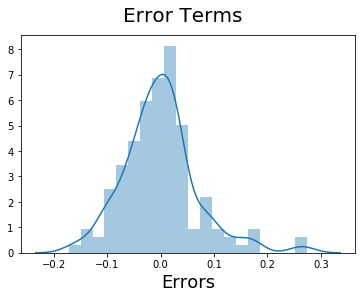

In [239]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error Terms are following Normal distribution and mean lies at zero. So we can conclude that we have a good model.

##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model - lm8

Applying the scaling on the test sets


In [241]:
# Apply scaler() to all the numerica columns
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
160,0,1,1,4,1,0.313793,0.409756,0.341667,0.460177,0.235066,...,0,0,0,0,1,0,0,0,0,0
186,2,1,1,4,1,0.368966,0.497561,0.433333,0.699115,0.305275,...,0,0,0,0,0,0,0,1,0,0
59,1,1,1,2,1,0.420690,0.596748,0.516667,0.522124,0.347944,...,0,0,0,0,0,0,0,0,0,0
165,1,1,1,2,1,0.272414,0.448780,0.308333,0.424779,0.301396,...,0,0,0,0,1,0,0,0,0,0
140,2,1,1,2,1,0.231034,0.263415,0.291667,0.699115,0.291699,...,0,0,0,1,0,0,0,0,0,0


In [242]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarName__porsche,CarName__renault,CarName__saab,CarName__subaru,CarName__toyota,CarName__toyouta,CarName__vokswagen,CarName__volkswagen,CarName__volvo,CarName__vw
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0
mean,0.919355,0.887097,0.822581,3.129032,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.016129,0.0,0.048387,0.016129,0.193548,0.0,0.016129,0.064516,0.080645,0.0
std,1.358620,0.319058,0.385142,0.999736,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.127000,0.0,0.216335,0.127000,0.398304,0.0,0.127000,0.247676,0.274512,0.0
min,-2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,1.000000,2.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,1.000000,4.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,2.000000,1.000000,1.000000,4.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,3.000000,1.000000,1.000000,4.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


We have fit the Scaler on Training set and transformed Test data using the Scaler which was fit on Training data

Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [252]:
# Remove const from X_train_new8 and create X_train_final and make X_Test_lm8 with columns in X_train_final from X_test
X_train_final = X_train_new8.drop(["const"], axis = 1)

In [253]:
X_train_final

,enginelocation,carwidth,curbweight,cylindernumber,peakrpm,engine__l,CarName__bmw
122,1,0.291667,0.272692,4,0.551020,0,0
125,1,0.666667,0.500388,4,0.551020,0,0
166,1,0.308333,0.314973,4,1.000000,0,0
1,1,0.316667,0.411171,4,0.346939,0,0
199,1,0.575000,0.647401,4,0.387755,0,0
...,...,...,...,...,...,...,...
87,1,0.425000,0.354926,4,0.551020,0,0
103,1,0.516667,0.609775,6,0.428571,0,0
67,1,0.833333,0.786268,5,0.081633,0,0
24,1,0.291667,0.185803,4,0.551020,0,0


In [254]:

X_test_final = X_test[X_train_final.columns]

In [255]:

X_test_final.head()

,enginelocation,carwidth,curbweight,cylindernumber,peakrpm,engine__l,CarName__bmw
160,1,0.341667,0.235066,4,0.265306,0,0
186,1,0.433333,0.305275,4,0.448980,0,0
59,1,0.516667,0.347944,4,0.265306,0,0
165,1,0.308333,0.301396,4,1.000000,0,0
140,1,0.291667,0.291699,4,0.102041,0,0


In [259]:
# Add constant to X_test_final

X_test_final_sm = sm.add_constant(X_test_final)
# Making predictions using the lm8 model

y_test_pred = lm8.predict(X_test_final_sm)

## Model Evaluation
Let us compute r2_score for Test Data set to evaluate the model

In [260]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8674016065190078

r2_score of on Train data is 0.892 and on r2_score is 0.867, both are pretty close - which means our model is generalised to test data and we can conclude that it is a decent model.
We can see that the equation of our best fitted line is:

𝑝𝑟𝑖𝑐𝑒 = 0.197 - 0.502 * enginelocation + 0.329 *	carwidth + 0.537 * curbweight + 0.025 * cylindernumber + 0.078 * peakrpm - 0.076 * engine__l + 0.254 * CarName__bmw

Inferences to Business : 

1) enginelocation coef is -0.502, that is, rear engine location gets higher price than front engine

2) higher carwidth, curnweight, cylindernumber,peakrpm get higher price for the car

3) enginetype l has negative coefficient so, it is recommended to use engine types other than l

4) Cars similar to bmw brand can get higher price

How well each of the variables influence the price of the car can be obtained based on the coefficients of the variables.